# Script to check various properties of the data

In [84]:
# Call packages
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from util.formatting.mid_price_from_orderbook import save_mid_price

In [8]:
# Retrieve and save midprice
save_mid_price("log/historic_test003/ORDERBOOK_IBM_FREQ_T.bz2", "log/historic_test003/")

Processing order book: 100%|██████████| 390/390 [00:00<00:00, 983.02it/s]


In [11]:
# Read midprice data
mid_price = pd.read_pickle("log/historic_test003/ORDERBOOK_IBM_FREQ_T_mid_price.bz2")

### Stylised facts to check

Note the following:

\begin{equation}
m_t = \frac{a_t + b_t}{2}
\end{equation}

\begin{equation}
r_{t,\Delta t} = ln(m_{t + \Delta t}) - ln(m_t)
\end{equation}




- Absence of autocorrelations in periods greater than 20 minutes - we will set the asset return times scale $(\Delta t)$ to 1 minute


\begin{equation}
corr(r_{t + \tau, \Delta t}, r_{t, \Delta t})
\end{equation}



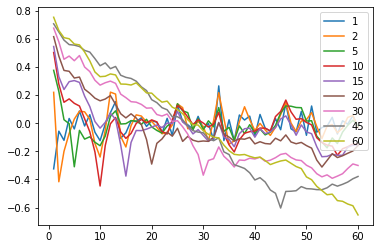

In [74]:
# set correlation period and asset return interval
corr_period = range(1, 61)
asset_return_interval = [1,2,5,10,15,20,30,45,60]
corr = pd.DataFrame(index=corr_period, columns=asset_return_interval)


# Convert price data to asset returns data
for i in asset_return_interval:

    returns = mid_price.diff(periods=i)[i:]
    dummy = []

    # Convert asset returns data to correlation over set periods 
    for j in corr_period:
        
        dummy.append(np.corrcoef(returns[0:-1*j], returns[j:])[0, 1])

    corr[i] = dummy

    # Plot correlation
    plt.plot(np.linspace(1,60,60), corr[i], label=i)

plt.legend()


- Heavy tails and aggregation normality


6.793065228457808
6.616026575146066
6.098456495248268
4.34977266909048
3.8572729101437586
3.887929245977925
3.045483800893934
2.6981822433483833
2.505444336224477


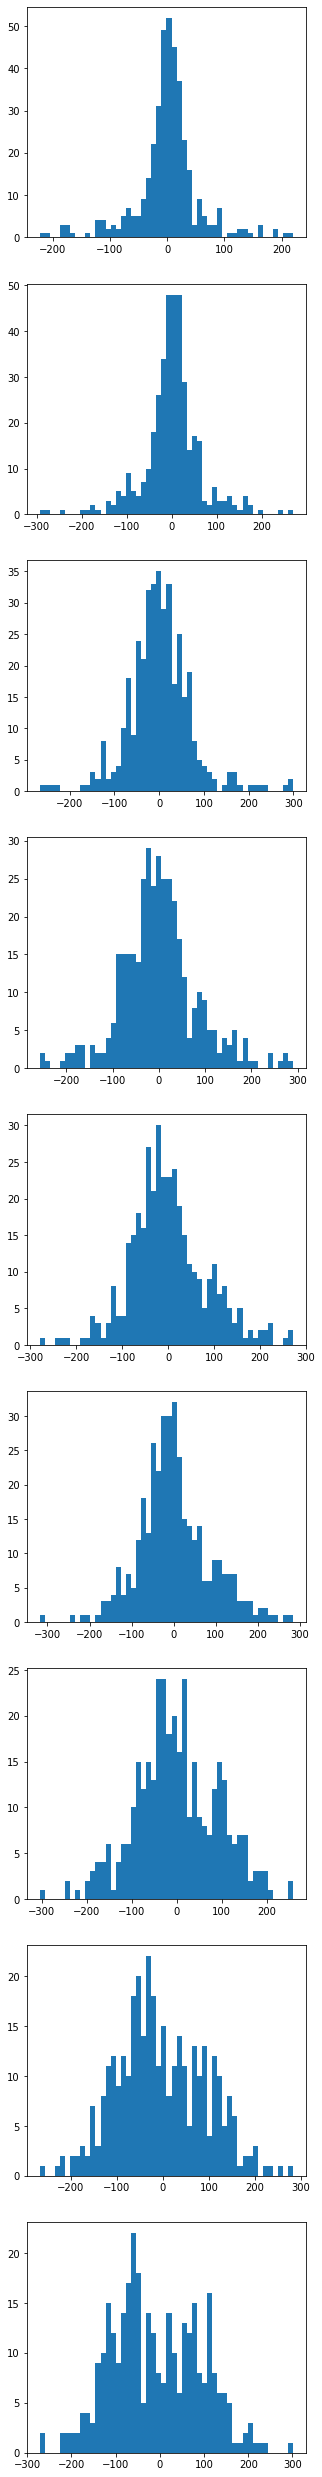

In [86]:
# Convert price data to asset returns data
fig, ax = plt.subplots(nrows=len(asset_return_interval), ncols=1, figsize=(5, len(asset_return_interval)*5))
axis = 0

for i in asset_return_interval:

    # calculate asset returns
    returns = mid_price.diff(periods=i)[i:]

    # plot
    ax[axis].hist(returns, 50)
    axis += 1

    # print kurtosis
    print(stats.kurtosis(returns, fisher=False))

In [ ]:
- Intermittency
- Volatility clustering
- Long range dependence
- Gain/Loss asymmetry
- Volume/volatility positive correlation
- Returns/volatility negative correlation
- Asymmetric causal information flow
- Best Bid/Ask distributed according to Gama distribution
- Order sizes are Power-law distributed
- Number of orders in a fixed time window is approximated by gamma/lognormal distribution 
- Order interarrival times are exponential/lognormal/Weibull
- New limit order prices are power-law distributed
- Lifetime of orders are power-law distributed
- Time correlation of order flow
- Lower spreads during higher Volume